In [1]:
from legal_backend.r_to_py.r_to_py import init_R
from legal_backend.bartCause.bart_cause import BARTCause
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import permutation_test
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
init_R()

### Infer Law Effect

In [6]:
#load csv files and load possible laws
df = pd.read_csv('data/pdmp_clean.csv')

In [7]:
df.rename(columns={'death-rate-2013-2016':'delta_death_rate'}, inplace=True)

In [8]:
df['Urbanicity'] = df['Urbanicity'].map({'Urban':1, 'Rural':0})

In [9]:
df.columns

Index(['Percent-of-Population-Under-15-(2013-2017)',
       'Percent-of-Population-Aged-15-to-64-(2013-2017)',
       'Percent-of-Population-65+-(2013-2017)',
       'Percent-of-Population-White-(non-Hispanic)-(2013-2017)',
       'Percent-of-Populaiton-Black-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Hispanic-or-Latino-(2013-2017)',
       'Percent-of-Population-Asian-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Native-American/Alaska-Native-(non-Hispanic)-(2013-2017)',
       'Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017)',
       'Percent-of-Population-Aged-25+-who-Have-at-Least-a-High-School-Diploma-(2013-2017)',
       'Percent-of-Population-Aged-25+-who-Have-a-Bachelor's-Degree-or-More-(2013-2017)',
       'Poverty-Rate-(2013-2017)', 'Median-Household-Income-(2013-2017)',
       'Unemployment-Rate-(2013-2017)',
       'Percent-of-Residents-with-a-Disability-(Aged-18-64)-(2013-2017)',
       'Percent-of-Popualtion-Employed-in-Mini

### Negative Patterns

In [132]:
# df_sub = df[df['Percent-of-Population-Under-15-(2013-2017)']>0.202].reset_index(drop=True)
# df_sub = df_sub[df_sub['Percent-of-Popualtion-Employed-in-Mining-and-Natural-Resources-(2013-2017)']>0.019].reset_index(drop=True)
# df_sub = df[df['Percent-of-Population-Under-15-(2013-2017)']>0.202].reset_index(drop=True)
# law = 'naloxone-thirdcare'

In [30]:
# df_sub = df[df['Percent-of-Residents-with-a-Disability-(Aged-18-64)-(2013-2017)']<0.116].reset_index(drop=True)
# df_sub = df[df['Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017)']>0.001].reset_index(drop=True)
# df_sub = df[df['Percent-of-Population-Aged-25+-who-Have-a-Bachelor\'s-Degree-or-More-(2013-2017)']>0.221].reset_index(drop=True)
# df_sub = df_sub[df_sub['Economic-Risk-Score']==3].reset_index(drop=True)
# law = 'reportable-drugs_Federal Schedule I'

In [63]:
df_sub = df[df['Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017)']>0.001].reset_index(drop=True)
# df_sub = df_sub[df_sub['Percent-of-Population-Hispanic-or-Latino-(2013-2017)']>0.127].reset_index(drop=True)
law = 'reportable-drugs_Federal Schedule III'

In [ ]:
# df_sub = df[df['poverty_rate_(2013_2017)']<0.102].reset_index(drop=True)
# law = 'PDMP_any'

In [ ]:
# df_sub = df[df['median_household_income_(2013_2017)']<52314].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']>0.05].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']<0.139].reset_index(drop=True)

In [ ]:
# df_sub = df[df['percent_of_populaiton_black_(non_hispanic)_(2013_2017)']>0.03].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']>0.05].reset_index(drop=True)
# df_sub = df_sub[df_sub['percent_of_population_hispanic_or_latino_(2013_2017)']<0.139].reset_index(drop=True)
# law = 'PDMP_leowhenActive investigations'

In [64]:
print(law)
print(df_sub.shape[0])
df_sub.head()

reportable-drugs_Federal Schedule III
202


,Percent-of-Population-Under-15-(2013-2017),Percent-of-Population-Aged-15-to-64-(2013-2017),Percent-of-Population-65+-(2013-2017),Percent-of-Population-White-(non-Hispanic)-(2013-2017),Percent-of-Populaiton-Black-(non-Hispanic)-(2013-2017),Percent-of-Population-Hispanic-or-Latino-(2013-2017),Percent-of-Population-Asian-(non-Hispanic)-(2013-2017),Percent-of-Population-Native-American/Alaska-Native-(non-Hispanic)-(2013-2017),Percent-of-Population-Native-Hawaiian/Pacific-Islander-(2013-2017),Percent-of-Population-Aged-25+-who-Have-at-Least-a-High-School-Diploma-(2013-2017),...,share-dispecheck,dispenser-freq,share-stateagen,share-insurance,state-share,share-provision_Receiving state must allow reciprocity with this state,share-provision_Must have bilateral memorandum of understanding or data sharing agreement,share-provision_Only if other state has PDMP laws consistent with or similar to this state,share-provision_Physically bordering states only or higher priority,share-provision_None of the above restrictions
0,0.2120,0.6619,0.1260,0.4872,0.4202,0.0507,0.0068,0.0037,0.0022,0.8256,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.2099,0.7006,0.0895,0.5984,0.0531,0.0872,0.0880,0.0671,0.0223,0.9329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2097,0.7120,0.0784,0.7153,0.0398,0.0747,0.0288,0.0600,0.0050,0.9439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2279,0.6765,0.0956,0.8037,0.0098,0.0452,0.0133,0.0504,0.0018,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1859,0.6166,0.1976,0.5630,0.0371,0.3440,0.0173,0.0082,0.0028,0.8659,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [89]:
from collections import Counter
Counter(df_sub[law])

Counter({0.0: 128, 1.0: 74})

In [65]:
# construct train test data 
def prepare_train_data(df, law):
    train_idxs, test_idxs = train_test_split(list(df.index), test_size=0.2, random_state=1)

    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 


    X_train = X_df[train_idxs,:]
    X_test = X_df[test_idxs,:]

    y_train = y[train_idxs,:]
    y_test= y[test_idxs,:]

    Z_train = Z_law[train_idxs,:]
    Z_test= Z_law[test_idxs,:]

    # standardize data
    scaler_ = preprocessing.StandardScaler().fit(X_train[:,num_cols])
    X_train_scaled = np.copy(X_train)
    X_train_scaled[:,num_cols] = scaler_.transform(X_train[:,num_cols])

    X_test_scaled = np.copy(X_test)
    X_test_scaled[:,num_cols] = scaler_.transform(X_test[:,num_cols])
    return X_train_scaled, y_train, Z_train, X_test_scaled, y_test, Z_test


In [66]:
X_train_scaled, y_train, Z_train, X_test_scaled, y_test, Z_test = prepare_train_data(df_sub, law)

In [67]:
bart_eval = BARTCause()

In [68]:
bart_eval.fit(X_train_scaled, y_train, Z_train, n_samples=1000,  n_burn=200,  n_chains=10)

In [69]:
def rmse(y, y_pred):
    rmse = np.sqrt((np.sum((y - y_pred) ** 2) / y.shape[0]))
    return rmse

In [70]:
def nrmse(y, y_pred, norm_method):
    rmse = np.sqrt((np.sum((y - y_pred) ** 2) / y.shape[0]))
    if norm_method=='mean':
        nrmse = rmse / y.mean()
    elif norm_method=='range':
        nrmse = rmse / (y.max() - y.min())
    else:
        nrmse = rmse
    return nrmse

In [71]:
# evaluate BART fit on response surface
newData = np.concatenate((X_test_scaled, Z_test), axis=1)

y_test_predicted_ = bart_eval.predict(newData, infer_type="mu")
y_test_predicted = y_test_predicted_[:,np.newaxis]

In [72]:
print("BART RMS:", rmse(y_test,y_test_predicted),"\n", "Baseline RMS:", rmse(y_test,y_test.mean()))

BART RMS: 19.186171532207236 
 Baseline RMS: 21.526947931998148


In [73]:
def r_square(y, y_pred):
    # residual sum of squares
    ss_res = np.sum((y - y_pred) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [74]:
# evaluate BART fit on response surface
newData = np.concatenate((X_test_scaled, Z_test), axis=1)

y_test_predicted_ = bart_eval.predict(newData, infer_type="mu")
y_test_predicted = y_test_predicted_[:,np.newaxis]

r_square(y_test,y_test_predicted)

0.20565031968967806

#### K-fold Cross Validation

In [75]:
def kfold_indices(data, k):

    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [76]:
fold_indices = kfold_indices(df_sub, 5)

In [77]:
def cross_validation_test(df, law, fold_indices):
    bartCause = BARTCause()
    
    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 

    scores = []

    for fold, (train_indices, test_indices) in enumerate(fold_indices):
        print("fold:",fold)
        X_train, y_train, Z_train = X_df[train_indices,:], y[train_indices,:], Z_law[train_indices,:]
        X_test, y_test, Z_test = X_df[test_indices,:], y[test_indices,:], Z_law[test_indices,:]

        # standardize data
        scaler_ = preprocessing.StandardScaler().fit(X_train[:,num_cols])
        X_train_scaled = np.copy(X_train)
        X_train_scaled[:,num_cols] = scaler_.transform(X_train[:,num_cols])

        X_test_scaled = np.copy(X_test)
        X_test_scaled[:,num_cols] = scaler_.transform(X_test[:,num_cols])
        
        # Train the model on the training data
        bartCause.fit(X_train_scaled, y_train, Z_train, n_samples=1000,  n_burn=200,  n_chains=10)

        # Make predictions on the test data
        test_data = np.concatenate((X_test_scaled, Z_test), axis=1)
        y_test_pred_ = bartCause.predict(test_data, infer_type="mu")
        y_test_pred = y_test_pred_[:,np.newaxis]
        
        # Calculate the accuracy score for this fold
        fold_score = nrmse(y_test, y_test_pred, 'range')
        
        # Append the fold score to the list of scores
        scores.append(fold_score)

    # Calculate the mean accuracy across all folds
    mean_score = np.mean(scores)

    return scores, mean_score

In [78]:
scores, mean_score = cross_validation_test(df_sub, law, fold_indices)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Score:", mean_score)

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
K-Fold Cross-Validation Scores: [0.23271795555182143, 0.2875277672517521, 0.2249164418156391, 0.2126771366156222, 0.30138318269832937]
Mean Score: 0.2518444967866328


#### Permutation Test

In [79]:
# construct train test data 
def prepare_permute_data(df, law):

    X_df = df.iloc[:, :27].to_numpy()
    M = X_df.shape[1] 

    y = df[['delta_death_rate']].to_numpy()
    Z_law = df[[law]].to_numpy()
    # numerical columns
    num_cols = [c for c in range(M) if len(np.unique(X_df[:, c])) > 2] 


    # standardize data
    scaler_ = preprocessing.StandardScaler().fit(X_df[:,num_cols])
    X_scaled = np.copy(X_df)
    X_scaled[:,num_cols] = scaler_.transform(X_df[:,num_cols])

    return X_scaled, y, Z_law


In [80]:
bartCause = BARTCause()
X_scaled, y, Z_law = prepare_permute_data(df_sub, law)

In [81]:
bartCause.fit(X_scaled, y, Z_law, n_samples=1000,  n_burn=200,  n_chains=10)

In [82]:
# evaluate BART fit on response surface
newData = np.concatenate((X_scaled, Z_law), axis=1)

predicted_Z1 = bartCause.predict(newData, infer_type="mu.1")
predicted_Z0 = bartCause.predict(newData, infer_type="mu.0")
# predicted_Z1 = predicted_Z1_[:,np.newaxis]
# predicted_Z0 = predicted_Z0_[:,np.newaxis]
mean_law0 = predicted_Z0.mean()
mean_law1 = predicted_Z1.mean()

In [83]:
# prepare for permutation test
def statistic(x, y):
    return np.mean(x) - np.mean(y)

#### Permutation test

In [84]:
res_permute = permutation_test((predicted_Z0, predicted_Z1), statistic, alternative='less')
res_permute

PermutationTestResult(statistic=10.789807546968198, pvalue=1.0, null_distribution=array([ 0.29515713, -0.06574514, -2.25038129, ..., -1.02357699,
       -2.14834269,  1.06909119]))

#### Paired Samples t-Test (Dependent Samples t-Test)

In [85]:
res_ttest = stats.ttest_rel(predicted_Z0, predicted_Z1, alternative='less')
res_ttest

TtestResult(statistic=106.29844279623623, pvalue=1.0, df=201)

#### Mann-Whitney U Test / Wilcoxon Rank-Sum Test (No normal distribution assumption)

In [86]:
res_mannwhitneyu = stats.mannwhitneyu(predicted_Z0, predicted_Z1, alternative='less')
res_mannwhitneyu

MannwhitneyuResult(statistic=31469.0, pvalue=1.0)

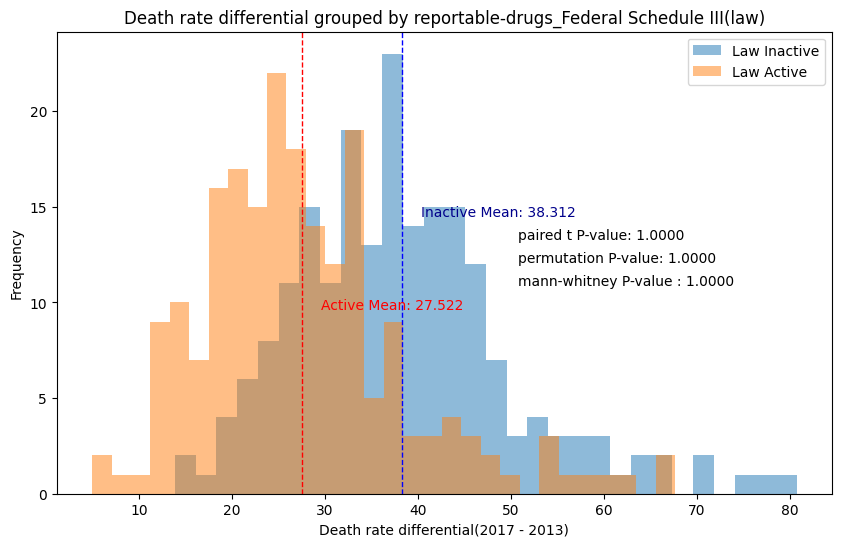

In [87]:

plt.figure(figsize=(10, 6))
plt.hist(predicted_Z0, bins=30, alpha=0.5, label='Law Inactive')
plt.hist(predicted_Z1, bins=30, alpha=0.5, label='Law Active')

plt.axvline(mean_law0, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_law0 + 2, plt.ylim()[1] * 0.6, f'Inactive Mean: {mean_law0:.3f}', color='darkblue')
plt.axvline(mean_law1, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_law1 + 2, plt.ylim()[1] * 0.4, f'Active Mean: {mean_law1:.3f}', color='red')

plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.45, f'mann-whitney P-value : {res_mannwhitneyu.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.5, f'permutation P-value: {res_permute.pvalue:.4f}', color='black')
plt.text(plt.xlim()[1]*0.6, plt.ylim()[1] * 0.55, f'paired t P-value: {res_ttest.pvalue:.4f}', color='black')


plt.xlabel('Death rate differential(2017 - 2013)')
plt.ylabel('Frequency')
plt.title('Death rate differential grouped by '+ law+'(law)')
plt.legend()
# plt.savefig("res/law_"+law+".png")
plt.show()